# IMDB Review Classification

In [1]:
from keras.datasets import imdb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

2025-02-24 15:09:06.070794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740427746.129361  424549 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740427746.145155  424549 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = imdb.load_data(num_words=10000)

In [3]:
x_train_raw.shape, y_train_raw.shape, x_test_raw.shape, y_test_raw.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
x_train = np.array(x_train_raw[::10])
y_train = np.array(y_train_raw[::10])
x_test = np.array(x_test_raw[::10])
y_test = np.array(y_test_raw[::10])
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2500,) (2500,) (2500,) (2500,)


In [5]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
y_train[0]

np.int64(1)

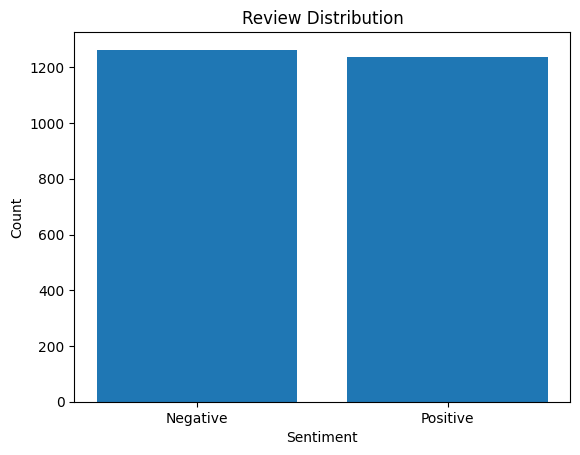

In [7]:
positives = y_train[y_train == 1]
negatives = y_train[y_train == 0]
plt.bar([0, 1], [len(negatives), len(positives)], tick_label=['Negative', 'Positive'])
plt.title("Review Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

x_train_flat = [' '.join(map(str, seq)) for seq in x_train]
x_test_flat = [' '.join(map(str, seq)) for seq in x_test]

In [9]:
vectorizer = CountVectorizer()
x_train_bow = vectorizer.fit_transform(x_train_flat).toarray()
x_test_bow = vectorizer.transform(x_test_flat).toarray()

In [10]:
words_process = x_train_bow.shape[1]

In [11]:
x_train = x_train_bow.reshape(-1, words_process, 1)
x_test = x_test_bow.reshape(-1, words_process, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_train.shape, y_test.shape

((2500, 9843, 1), (2500, 1))

In [34]:

model = Sequential([
    Input(shape=(words_process, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 9843)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,260,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,270,913 (4.85 MB)

 Trainable params: 1,270,913 (4.85 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=1024, validation_split=0.2)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.9755 - loss: 0.1118 - val_accuracy: 0.8640 - val_loss: 0.4644
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step - accuracy: 0.9732 - loss: 0.0915 - val_accuracy: 0.8660 - val_loss: 0.4624
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.9855 - loss: 0.0647 - val_accuracy: 0.8540 - val_loss: 0.4752
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - accuracy: 0.9878 - loss: 0.0650 - val_accuracy: 0.8620 - val_loss: 0.4814
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.9934 - loss: 0.0463 - val_accuracy: 0.8600 - val_loss: 0.5172
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - accuracy: 0.9937 - loss: 0.0376 - val_accuracy: 0.8660 - val_loss: 0.5750
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - accuracy: 0.9944 - loss: 0.0341 - val_accuracy: 0.8680 - val_loss: 0.5735
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step - accuracy: 0.9954 - loss: 0.0243 - val_accuracy: 0.8680 - val_loss: 

In [40]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
accuracy_score(y_test, y_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


0.846

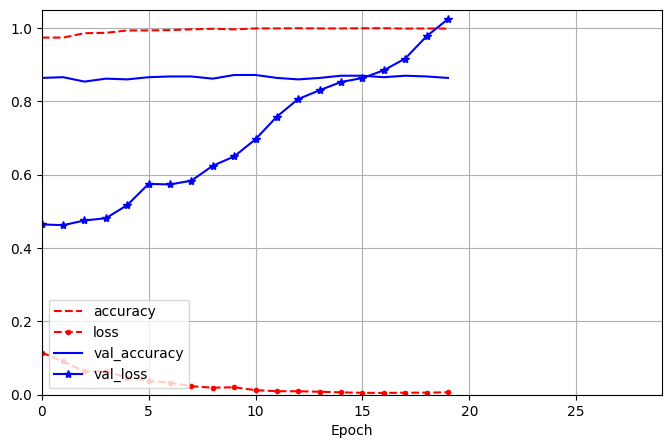

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1.05], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  
plt.show()